# DTSCAN Synthetic Datasets
This notebook previews the S1, S2, and S3 synthetic datasets recreated from the descriptions in the DTBSCAN paper.

In [5]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

# Resolve datasets directory from either repo root or notebooks folder
possible_roots = [Path('datasets'), Path('..') / 'datasets']
for candidate in possible_roots:
    if candidate.exists():
        DATASETS_DIR = candidate.resolve()
        break
else:
    raise FileNotFoundError('Could not locate datasets directory')

def load_dataset(name):
    path = DATASETS_DIR / f'{name}.csv'
    data = np.genfromtxt(path, delimiter=',', names=True)
    return {
        'x': data['x'],
        'y': data['y'],
        'label': data['label'].astype(int)
    }

datasets = {name: load_dataset(name) for name in ['S1', 'S2', 'S3']}


In [ ]:
for name, ds in datasets.items():
    unique_labels = np.unique(ds['label'])
    print(f"{name}: {ds['x'].shape[0]} points across {len(unique_labels)} classes -> {unique_labels.tolist()}")


/tmp/ipykernel_223360/2887261157.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(ds['x'], ds['y'], cmap='tab10', s=10)


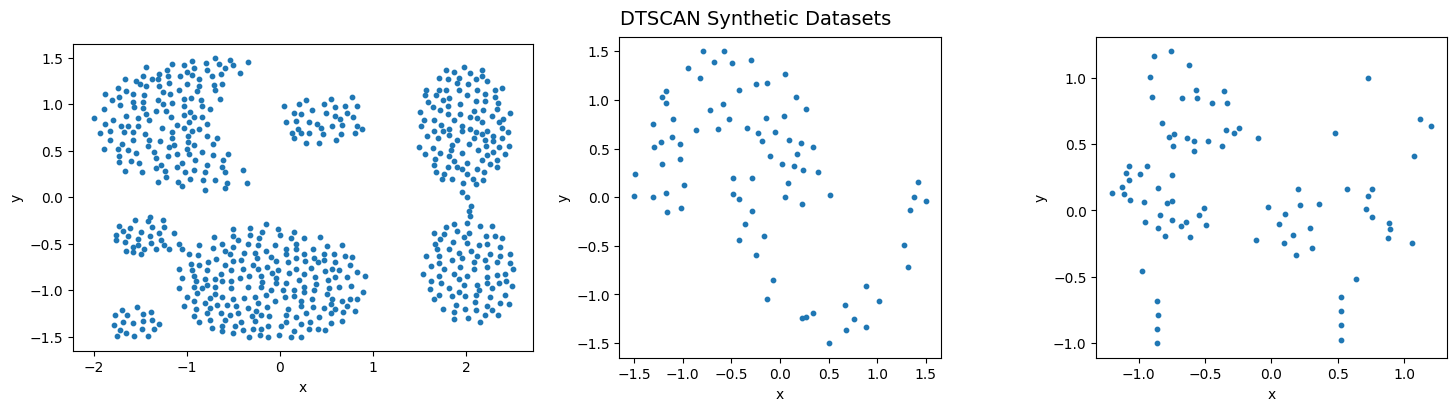

In [6]:
%matplotlib inline
fig, axes = plt.subplots(1, 3, figsize=(15, 4), constrained_layout=True)
for ax, (name, ds) in zip(axes, datasets.items()):
    scatter = ax.scatter(ds['x'], ds['y'], cmap='tab10', s=10)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_aspect('equal')
fig.suptitle('DTSCAN Synthetic Datasets', fontsize=14)
plt.show()